In [7]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

import matplotlib.pyplot as plt

import numpy as np
from src.utils_solver import Lmatrix2paths, adapted_empirical_measure, adapted_wasserstein_squared, quantization, nested
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [8]:
# Markovian
L = np.array([[1, 0, 0], [1, 2, 0], [2, 4, 2]])
M = np.array([[1, 0, 0], [2, 1, 0], [2, 1, 2]])
X, A = Lmatrix2paths(L, 1, verbose=False)
Y, B = Lmatrix2paths(M, 1, verbose=False)
dist_bench = adapted_wasserstein_squared(A, B)
print("Theoretical AW_2^2: ", dist_bench)

Theoretical AW_2^2:  11.0


In [9]:
def plot_errors(stat, dist_bench, n_sample_list):
    errors = stat

    mean_error = np.mean(errors, axis=1)
    std_error = np.std(errors, axis=1)

    # Plot mean error with shaded standard deviation
    plt.figure(figsize=(10, 5))
    plt.plot(n_sample_list, mean_error, label="Mean Error")
    plt.fill_between(n_sample_list, mean_error - std_error, mean_error + std_error, alpha=0.3, label="±1 Std Dev")

    # Labels and title
    plt.xlabel("n_sample")
    plt.ylabel("error")
    plt.title("Error Plot with Number of Samples")
    plt.legend()
    plt.grid(True)

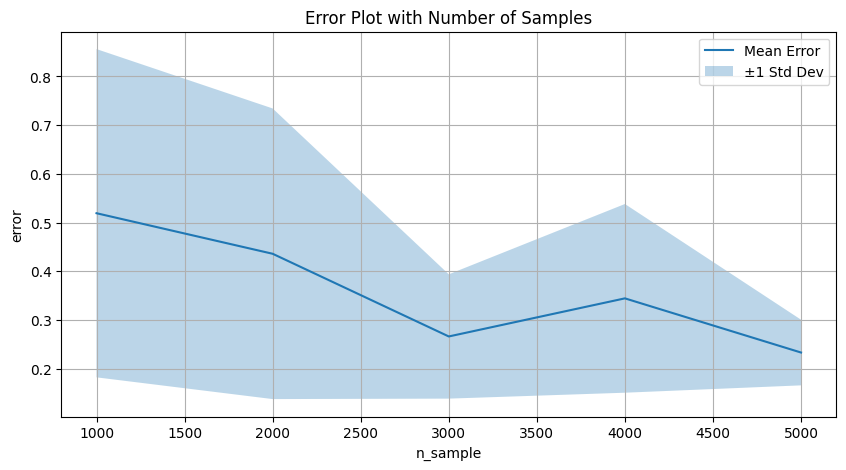

In [10]:
stat_markovian = np.load('stat_markovian.npy')
n_sample_list = np.array([1000, 2000, 3000, 4000, 5000])
plot_errors(stat_markovian, dist_bench, n_sample_list)